Author: Asri Pramudiya

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv('loan_customer.csv')
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,NaN,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,NaN,studio,APPROVE
618,LP002983,1982-03-08,6.281158e+11,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,NaN,house,APPROVE
619,LP002984,1986-12-05,6.281196e+11,Male,Yes,2,Graduate,No,7583.0,0.0,187000,360,30,1.0,NaN,house,APPROVE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

# Data Cleansing

## Handling missing values

In [4]:
df.isnull().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [5]:
df['birth_date']= pd.to_datetime(df['birth_date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   loan_id             621 non-null    object        
 1   birth_date          572 non-null    datetime64[ns]
 2   phone_number        569 non-null    float64       
 3   gender              608 non-null    object        
 4   married             618 non-null    object        
 5   dependents          605 non-null    object        
 6   education           620 non-null    object        
 7   self_employed       588 non-null    object        
 8   applicant_income    612 non-null    float64       
 9   coapplicant_income  621 non-null    float64       
 10  loan_amount         621 non-null    int64         
 11  loan_term_month     621 non-null    int64         
 12  loan_term_year      621 non-null    int64         
 13  credit_history      570 non-null    float64       

In [7]:
df['phone_number']= df['phone_number'].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   loan_id             621 non-null    object        
 1   birth_date          572 non-null    datetime64[ns]
 2   phone_number        621 non-null    object        
 3   gender              608 non-null    object        
 4   married             618 non-null    object        
 5   dependents          605 non-null    object        
 6   education           620 non-null    object        
 7   self_employed       588 non-null    object        
 8   applicant_income    612 non-null    float64       
 9   coapplicant_income  621 non-null    float64       
 10  loan_amount         621 non-null    int64         
 11  loan_term_month     621 non-null    int64         
 12  loan_term_year      621 non-null    int64         
 13  credit_history      570 non-null    float64       

In [9]:
df.drop('has_credit_card',axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   loan_id             621 non-null    object        
 1   birth_date          572 non-null    datetime64[ns]
 2   phone_number        621 non-null    object        
 3   gender              608 non-null    object        
 4   married             618 non-null    object        
 5   dependents          605 non-null    object        
 6   education           620 non-null    object        
 7   self_employed       588 non-null    object        
 8   applicant_income    612 non-null    float64       
 9   coapplicant_income  621 non-null    float64       
 10  loan_amount         621 non-null    int64         
 11  loan_term_month     621 non-null    int64         
 12  loan_term_year      621 non-null    int64         
 13  credit_history      570 non-null    float64       

In [11]:
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187.0,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,628776449212.0,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,628119240537.0,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,62856343702.0,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,628113008687.0,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,628564969545.0,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,studio,APPROVE
617,LP002979,1987-01-26,628116531578.0,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,studio,APPROVE
618,LP002983,1982-03-08,628115828430.0,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,house,APPROVE
619,LP002984,1986-12-05,628119590176.0,Male,Yes,2,Graduate,No,7583.0,0.0,187000,360,30,1.0,house,APPROVE


In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
property_type         0
loan_status           0
dtype: int64

In [14]:
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187.0,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,628776449212.0,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,628119240537.0,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,62856343702.0,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,628113008687.0,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,LP002974,1988-03-24,628573921780.0,Male,Yes,0,Graduate,No,3232.0,1950.0,108000,360,30,1.0,studio,APPROVE
616,LP002978,1976-03-25,628564969545.0,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,studio,APPROVE
617,LP002979,1987-01-26,628116531578.0,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,studio,APPROVE
618,LP002983,1982-03-08,628115828430.0,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,house,APPROVE


## Handling duplicated data

In [15]:
df.duplicated().sum()

5

In [16]:
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187.0,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,628776449212.0,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,628119240537.0,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,62856343702.0,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,628113008687.0,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,LP002974,1988-03-24,628573921780.0,Male,Yes,0,Graduate,No,3232.0,1950.0,108000,360,30,1.0,studio,APPROVE
616,LP002978,1976-03-25,628564969545.0,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,studio,APPROVE
617,LP002979,1987-01-26,628116531578.0,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,studio,APPROVE
618,LP002983,1982-03-08,628115828430.0,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,house,APPROVE


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187.0,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,628776449212.0,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,628119240537.0,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,62856343702.0,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,628113008687.0,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,LP002974,1988-03-24,628573921780.0,Male,Yes,0,Graduate,No,3232.0,1950.0,108000,360,30,1.0,studio,APPROVE
616,LP002978,1976-03-25,628564969545.0,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,studio,APPROVE
617,LP002979,1987-01-26,628116531578.0,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,studio,APPROVE
618,LP002983,1982-03-08,628115828430.0,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,house,APPROVE


## Handling Outlier

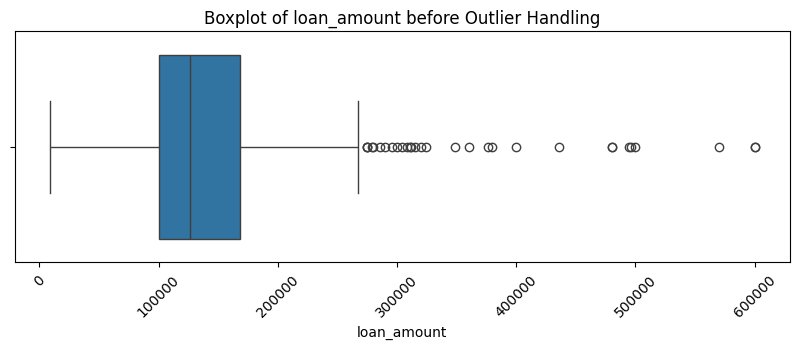

In [20]:
plt.figure(figsize=(10,3))

sns.boxplot(x='loan_amount', data=df)
plt.title('Boxplot of loan_amount before Outlier Handling')
plt.xticks(rotation=45)
plt.show()

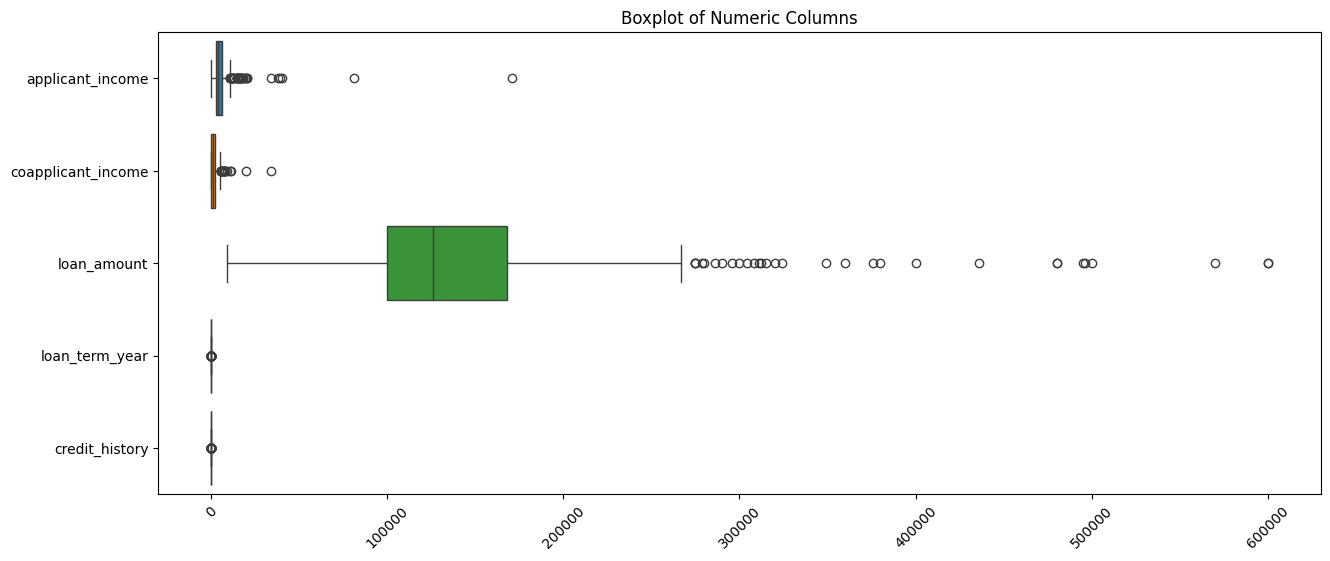

In [22]:
numeric_columns=['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_year', 'credit_history']
plt.figure(figsize=(15,6))
sns.boxplot(data=df[numeric_columns], orient='h')
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()

In [21]:
cols_to_check = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year', 'credit_history']
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    low_limit = Q1 - 1.5*IQR
    high_limit = Q3 + 1.5*IQR
    
    df = df[(df[col] >= low_limit) & (df[col] <= high_limit)]

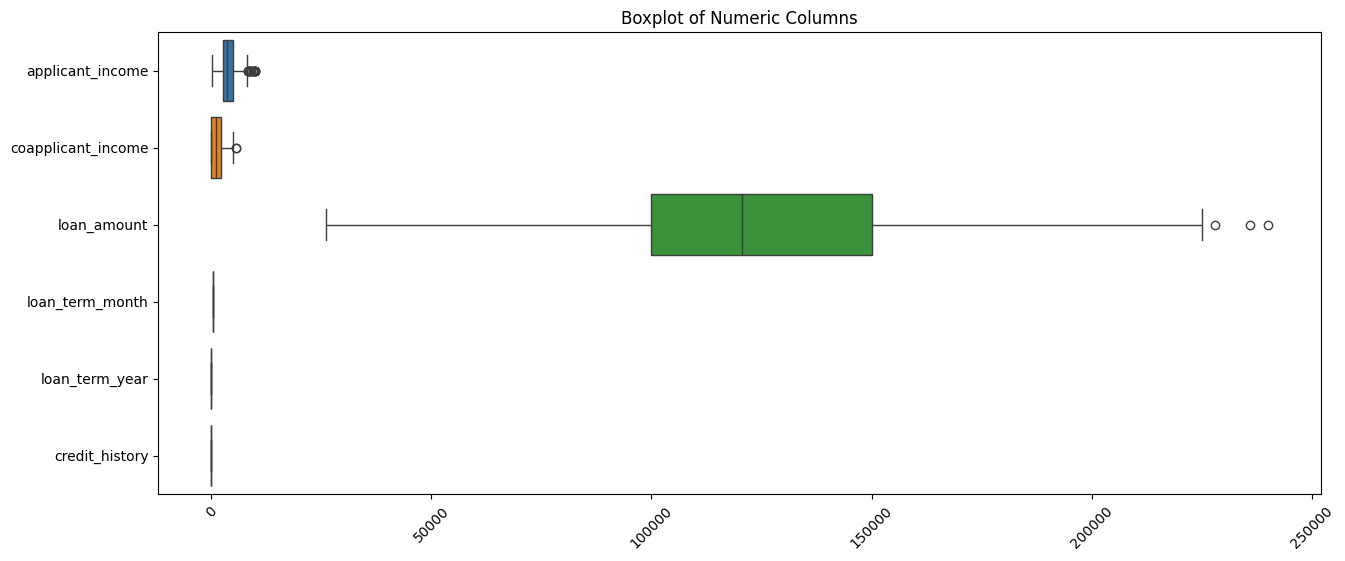

In [22]:
numeric_columns = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year', 'credit_history']
plt.figure(figsize=(15,6))
sns.boxplot(data=df[numeric_columns],orient='h')
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()

In [23]:
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187.0,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,628776449212.0,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,628119240537.0,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,62856343702.0,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,628113008687.0,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,LP002961,1983-02-14,62856591531.0,Male,Yes,1,Graduate,No,3400.0,2500.0,173000,360,30,1.0,apartment,APPROVE
614,LP002964,1984-02-27,628119143108.0,Male,Yes,2,Not Graduate,No,3987.0,1411.0,157000,360,30,1.0,studio,APPROVE
615,LP002974,1988-03-24,628573921780.0,Male,Yes,0,Graduate,No,3232.0,1950.0,108000,360,30,1.0,studio,APPROVE
616,LP002978,1976-03-25,628564969545.0,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,studio,APPROVE


## Feature Encoding

In [24]:
df1=df.copy()

In [25]:
kat=['gender','married','dependents','education','self_employed','property_type']

for i in kat:
  print('Kolom', i, df1[i].unique())

Kolom gender ['Male' 'Female']
Kolom married ['No' 'Yes']
Kolom dependents ['0' '1' '2' '3+']
Kolom education ['Graduate' 'Not Graduate']
Kolom self_employed ['No' 'Yes']
Kolom property_type ['house' 'studio' 'apartment']


In [26]:
mapping_gender={
    'Male':0,
    'Female':1
}
mapping_married={
    'No':0,
    'Yes':1
}
mapping_dependents={
    '0':0,
    '1':1,
    '2':2,
    '3+':3
}
mapping_education={
    'Graduate':0,
    'Not Graduate':1
}
mapping_self_employed={
    'No':0,
    'Yes':1
}
mapping_property_type={
    'house':0,
    'studio':1,
    'apartment':2
}

df1['gender']=df1['gender'].map(mapping_gender)
df1['married']=df1['married'].map(mapping_married)
df1['dependents']=df1['dependents'].map(mapping_dependents)
df1['education']=df1['education'].map(mapping_education)
df1['self_employed']=df1['self_employed'].map(mapping_self_employed)
df1['property_type']=df1['property_type'].map(mapping_property_type)
df1

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187.0,0,0,0,0,0,5849.0,0.0,100000,360,30,1.0,0,APPROVE
1,LP001003,1979-08-24,628776449212.0,0,1,1,0,0,4583.0,1508.0,128000,360,30,1.0,1,REJECT
2,LP001005,1991-03-28,628119240537.0,0,1,0,0,1,3000.0,0.0,66000,360,30,1.0,0,APPROVE
3,LP001006,1980-06-02,62856343702.0,0,1,0,1,0,2583.0,2358.0,120000,360,30,1.0,0,APPROVE
4,LP001008,1989-05-19,628113008687.0,0,0,0,0,0,6000.0,0.0,141000,360,30,1.0,0,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,LP002961,1983-02-14,62856591531.0,0,1,1,0,0,3400.0,2500.0,173000,360,30,1.0,2,APPROVE
614,LP002964,1984-02-27,628119143108.0,0,1,2,1,0,3987.0,1411.0,157000,360,30,1.0,1,APPROVE
615,LP002974,1988-03-24,628573921780.0,0,1,0,0,0,3232.0,1950.0,108000,360,30,1.0,1,APPROVE
616,LP002978,1976-03-25,628564969545.0,1,0,0,0,0,2900.0,0.0,71000,360,30,1.0,1,APPROVE


# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

In [27]:
df_gr1=df.groupby(['gender', 'property_type'])['loan_id'].count().reset_index()
df_gr1

,gender,property_type,loan_id
0,Female,apartment,24
1,Female,house,11
2,Female,studio,15
3,Male,apartment,90
4,Male,house,72
5,Male,studio,70


In [28]:
df_gr1.columns=['gender', 'property_type', 'count']
df_gr1

,gender,property_type,count
0,Female,apartment,24
1,Female,house,11
2,Female,studio,15
3,Male,apartment,90
4,Male,house,72
5,Male,studio,70


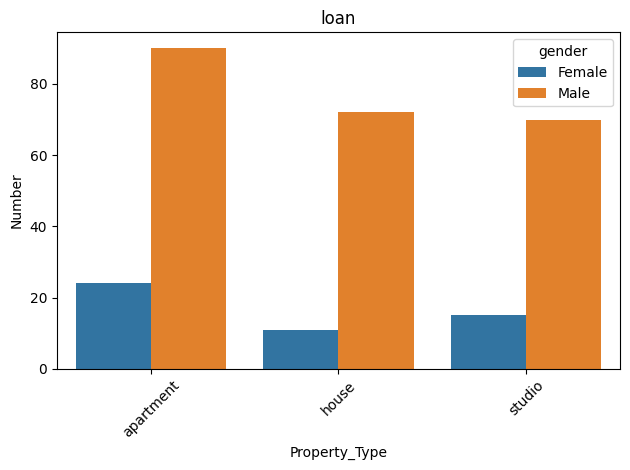

In [29]:
sns.barplot(x="property_type", y="count", hue="gender", data=df_gr1)

plt.xlabel("Property_Type")
plt.ylabel("Number")
plt.title("loan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

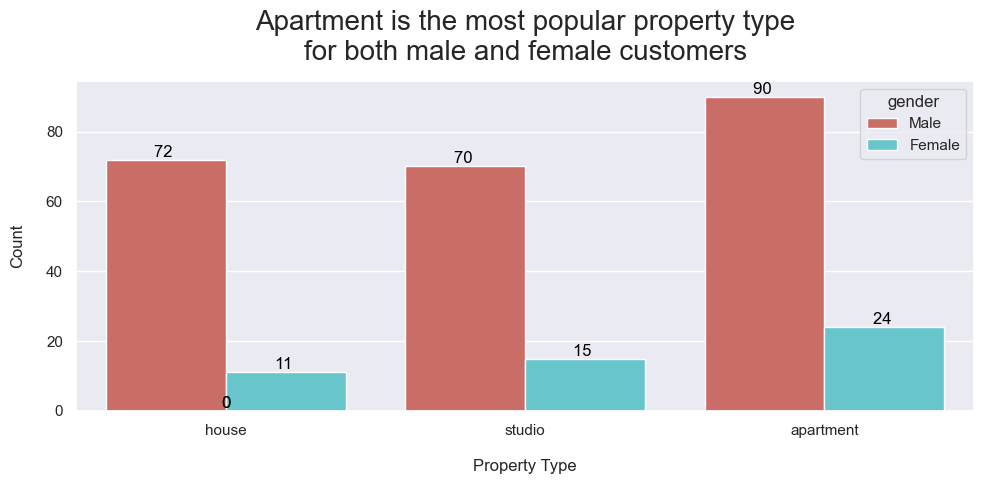

In [36]:
sns.set(style="darkgrid")
f,ax=plt.subplots(1,1,figsize=(10,5))
sns.countplot(x='property_type',data=df, hue='gender', palette="hls")

for bar in ax.patches:
    bar_value=bar.get_height()
    text=str(bar_value).replace('.0',' ')
    text_x=bar.get_x()+bar.get_width() / 2
    text_y=bar.get_y()+bar_value
    bar_color=bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)

ax.set_xlabel('Property Type', labelpad=15)
ax.set_ylabel('Count', labelpad=15)
ax.set_title('Apartment is the most popular property type\nfor both male and female customers', pad=15, size=20)
plt.tight_layout()
plt.savefig('gb1.png')

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam

In [31]:
df_gr2=df.groupby(['married', 'loan_term_year'])['loan_id'].count().reset_index()
df_gr2.columns=['married', 'loan_term_year', 'number_of_applicant']
df_gr2

,married,loan_term_year,number_of_applicant
0,No,30,106
1,Yes,30,176


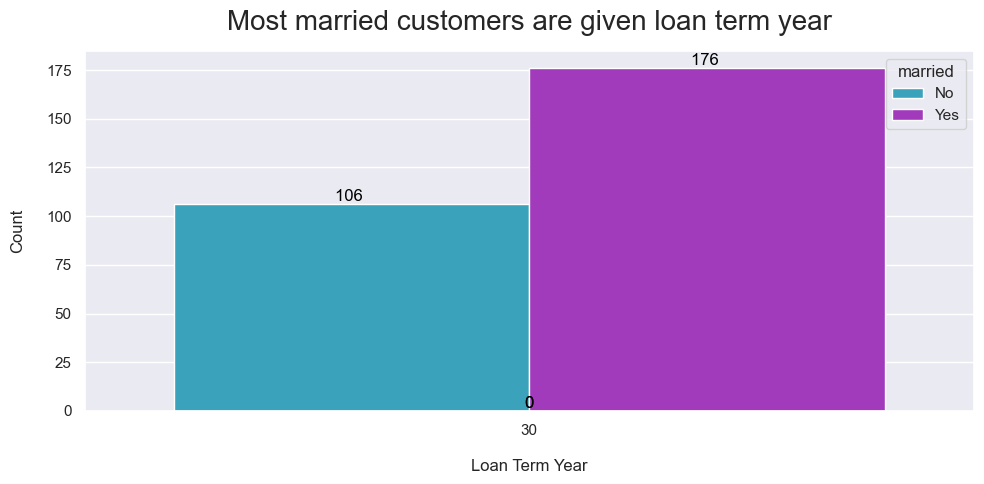

In [35]:
sns.set(style="darkgrid")
f,ax=plt.subplots(1,1,figsize=(10,5))
sns.countplot(x='loan_term_year',data=df, hue='married', palette=["#24b1d1", "#ae24d1"])

for bar in ax.patches:
  bar_value=bar.get_height()
  text=str(bar_value).replace('.0',' ')
  text_x=bar.get_x()+bar.get_width()/2
  text_y=bar.get_y()+bar_value
  bar_color=bar.get_facecolor()
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)

ax.set_xlabel('Loan Term Year', labelpad=15)
ax.set_ylabel('Count', labelpad=15)
ax.set_title('Most married customers are given loan term year', pad=15, size=20)
plt.tight_layout()
plt.savefig('gb2.png')